<a href="https://colab.research.google.com/github/Higna/Python/blob/main/Logistic_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
Learned parameters (theta): [ 0.5584676  -0.03161956]
Accuracy: 0.5748792270531401


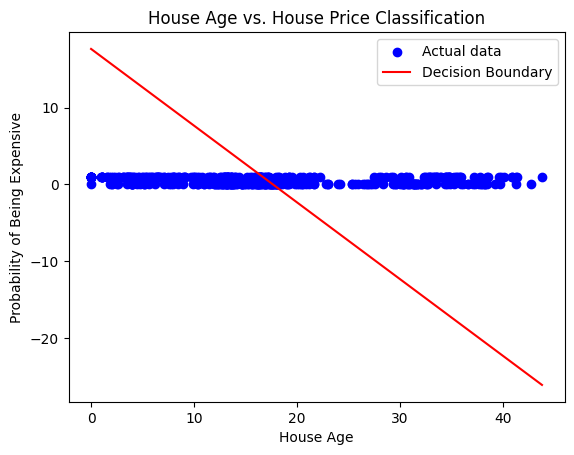

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

estate = '/content/drive/My Drive/UI/Real estate.csv'
df = pd.read_csv(estate)
print(df.columns)

X = df[['X2 house age']].values
y = df[['Y house price of unit area']].values

threshold = np.median(y)
y_binary = (y > threshold).astype(int).ravel()

X = np.hstack((np.ones((X.shape[0], 1)), X))

theta = np.zeros(X.shape[1])
learning_rate = 0.01
num_iterations = 10000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for _ in range(num_iterations):
    z = np.dot(X, theta)
    h = sigmoid(z)
    gradient = np.dot(X.T, (h - y_binary)) / y_binary.size
    theta -= learning_rate * gradient

print(f'Learned parameters (theta): {theta}')

def predict(X, theta):
    return sigmoid(np.dot(X, theta)) >= 0.5

y_pred = predict(X, theta)

accuracy = np.mean(y_pred == y_binary)
print(f'Accuracy: {accuracy}')

plt.scatter(X[:, 1], y_binary, color='blue', label='Actual data')

x_values = [X[:, 1].min(), X[:, 1].max()]
y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[1]
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

plt.title('House Age vs. House Price Classification')
plt.xlabel('House Age')
plt.ylabel('Probability of Being Expensive')
plt.legend()
plt.show()
